## [作業重點]
確保你了解隨機森林模型中每個超參數的意義，並觀察調整超參數對結果的影響

## 作業

1. 試著調整 RandomForestClassifier(...) 中的參數，並觀察是否會改變結果？
2. 改用其他資料集 (boston, wine)，並與回歸模型與決策樹的結果進行比較

In [1]:
from sklearn import datasets, metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [2]:
# 讀取鳶尾花資料集
iris = datasets.load_iris()

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25, random_state=4)

# 建立模型 (使用 10 顆樹，每棵樹的最大深度為 4)
clf = RandomForestClassifier(n_estimators=10,
                            criterion="gini",
                            max_features="auto", #如何選取features
                            max_depth=4,
                            min_samples_split=2,
                            min_samples_leaf=1)

# 訓練模型
clf.fit(x_train, y_train)

# 預測測試集
y_pred = clf.predict(x_test)

In [3]:
%matplotlib inline
from sklearn.externals.six import StringIO  
from IPython.display import Image, display
from sklearn.tree import export_graphviz
import pydotplus


def graphviz(_estimator):
    dot_data = StringIO()
    export_graphviz(_estimator, out_file=dot_data, 
                feature_names = iris.feature_names,
                class_names = iris.target_names,
                rounded = True, proportion = False,
                precision = 2, filled = True)

    _graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return _graph
    # Image(_graph.create_png())


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


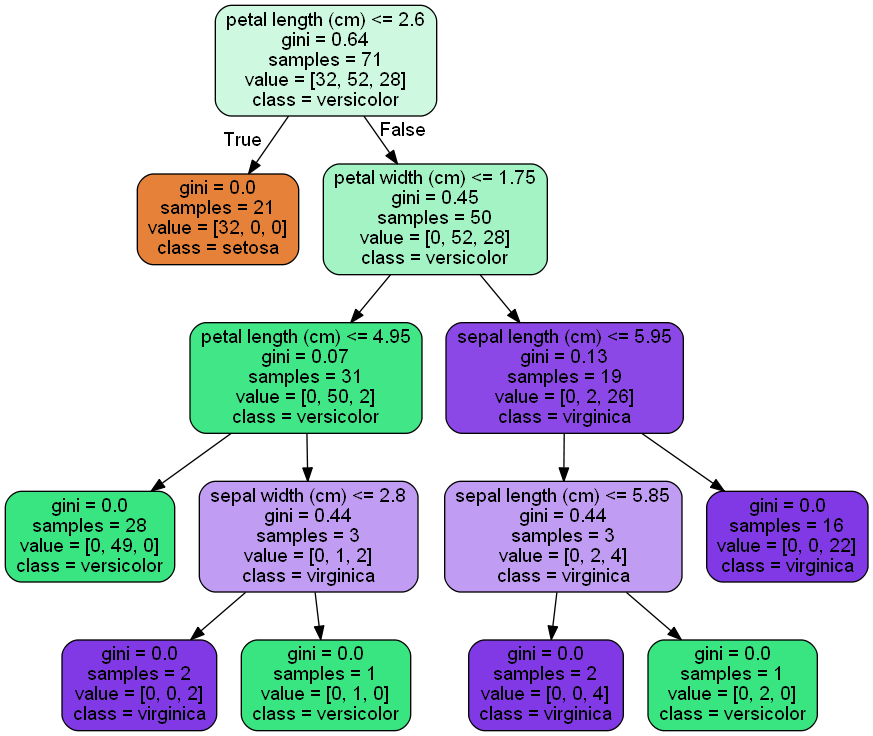

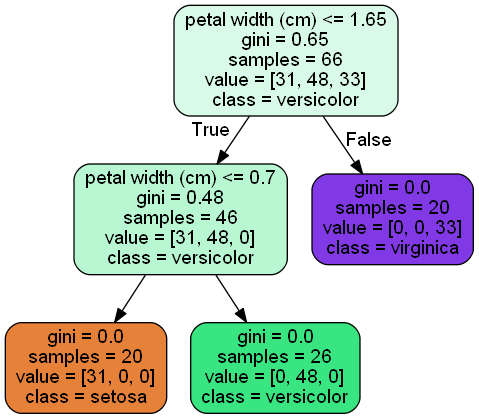

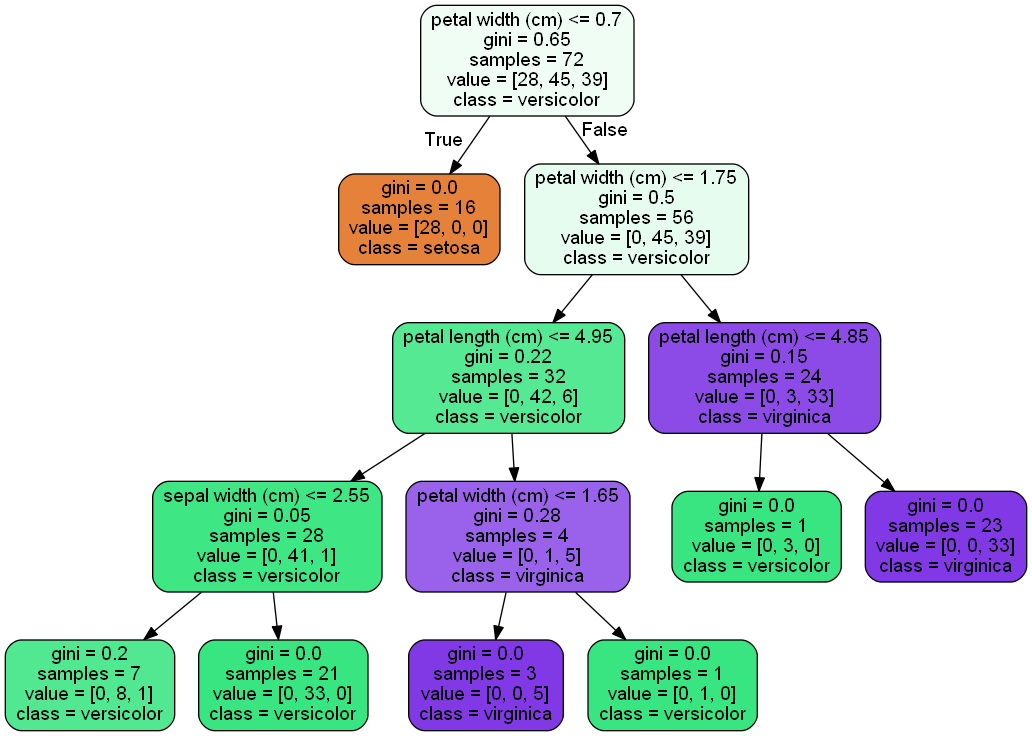

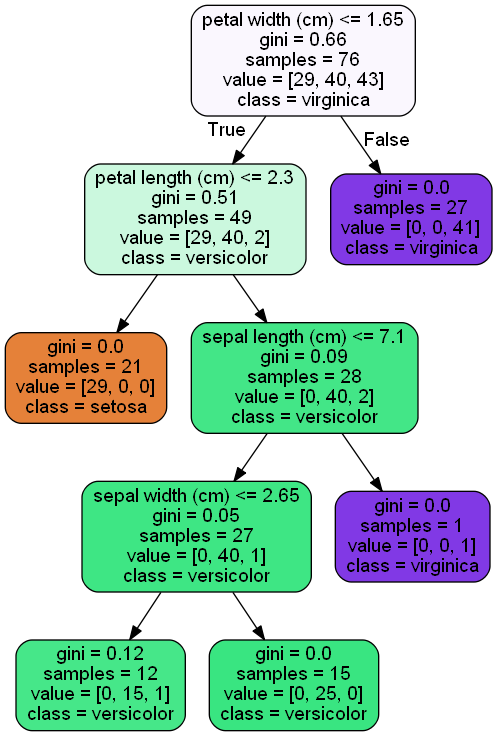

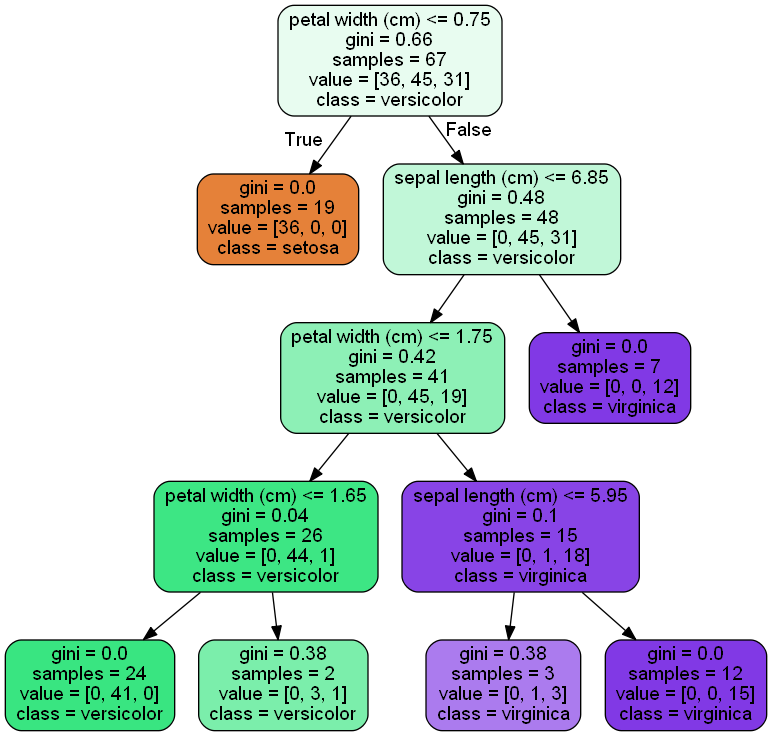

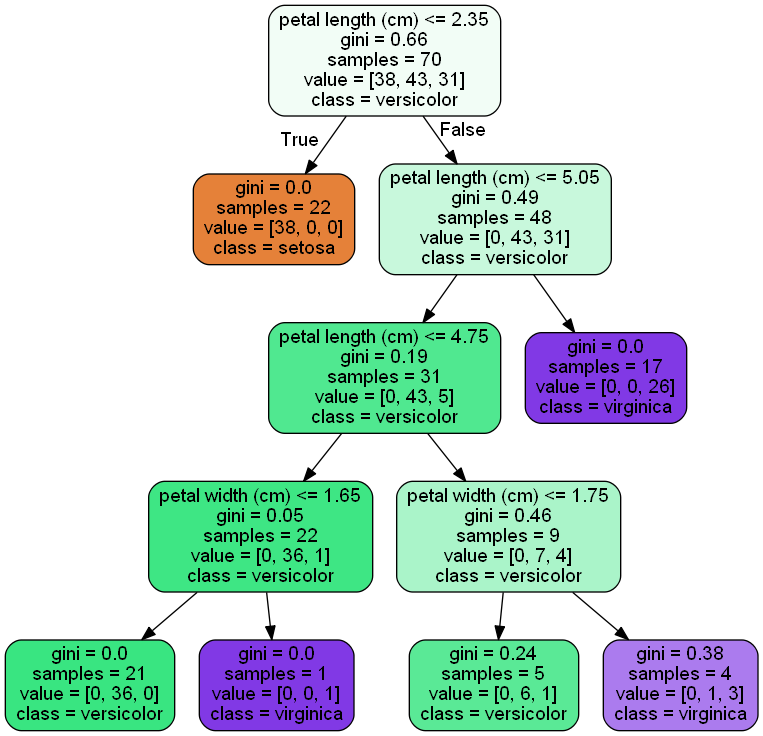

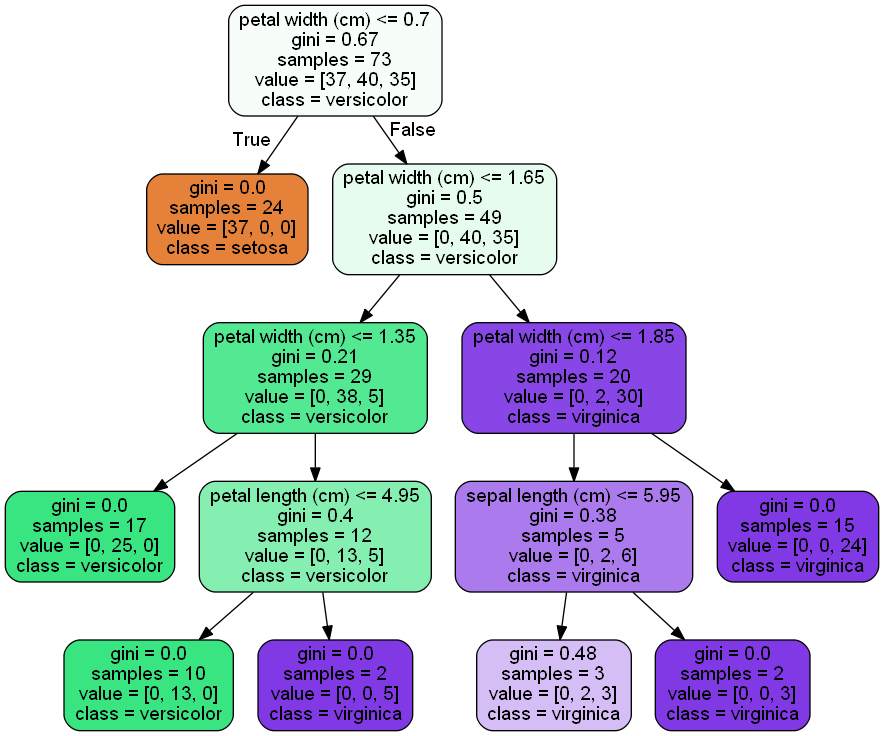

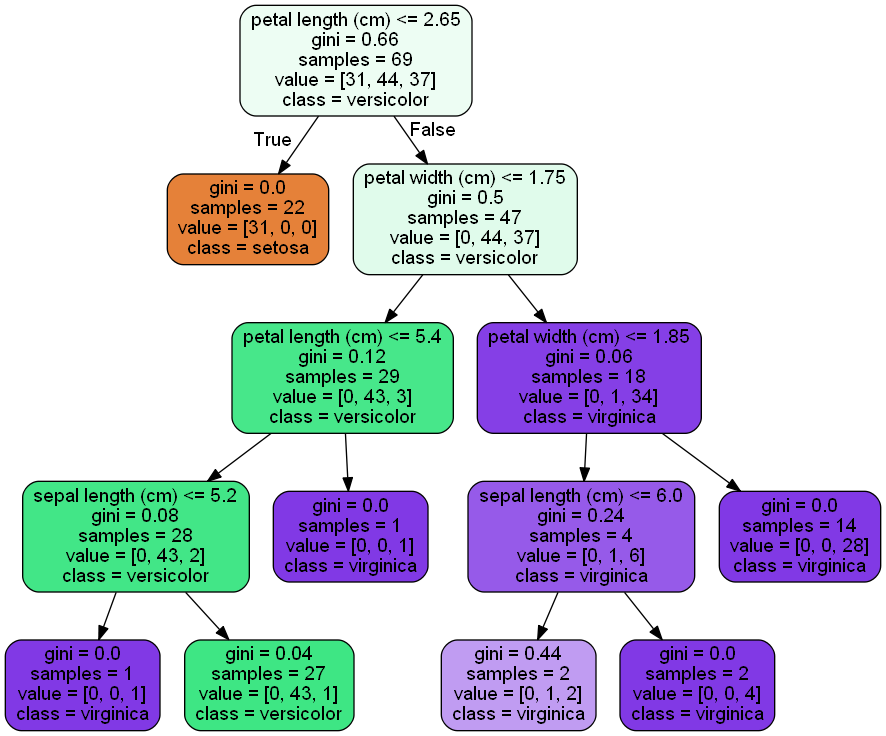

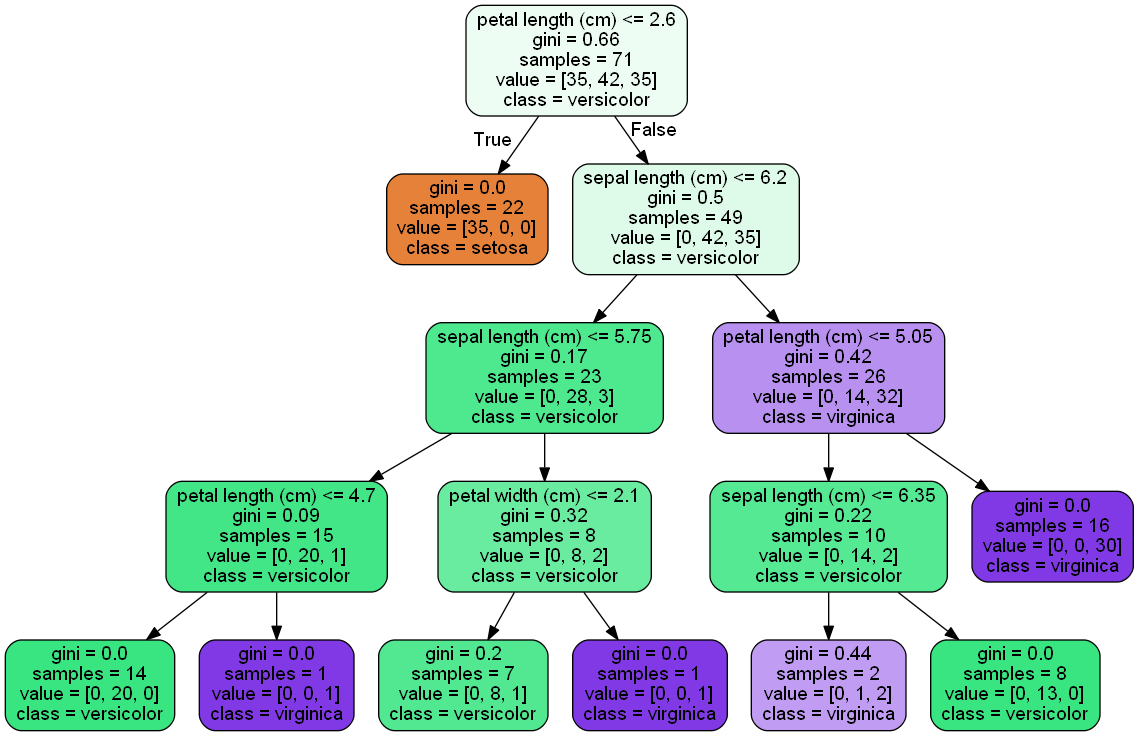

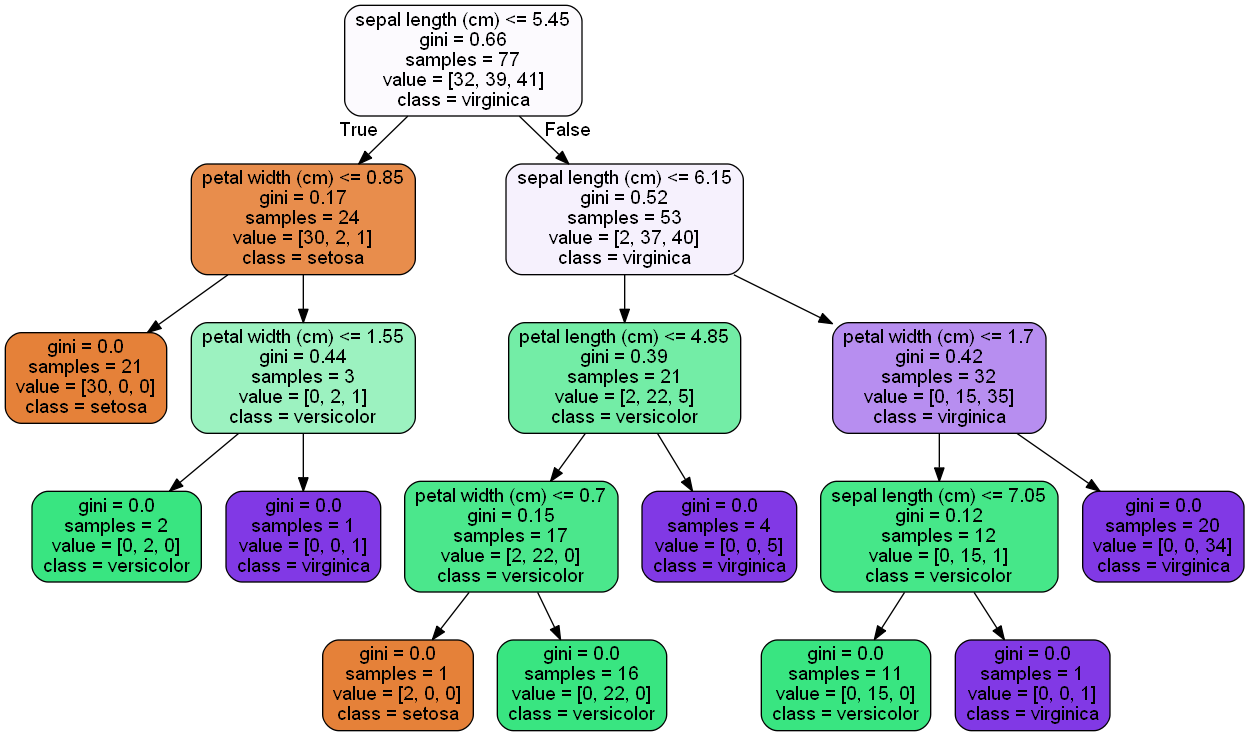

In [4]:
# Extract single tree
# estimator = clf.estimators_[9]
# graph = graphviz(estimator)
# Image(graph.create_png())

# display images
for _estimators in clf.estimators_:
    graph = graphviz(_estimators)
    display(Image(graph.create_png()))


In [5]:
acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)

Accuracy:  0.9736842105263158


In [6]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [7]:
print("Feature importance: ", clf.feature_importances_)

Feature importance:  [0.10009363 0.00220934 0.35670356 0.54099347]
